In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('tuma/tuma/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Separar as features (X) e o target (y)
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [4]:
arvore_cross1 = DecisionTreeClassifier(criterion='entropy')
scores_arvore_cross1 = cross_val_score(arvore_cross1, X, y, cv=10)

# Resultados
print("Acurácias em cada fold:", scores_arvore_cross1)
print("Acurácia média:", scores_arvore_cross1.mean())

Acurácias em cada fold: [0.67532468 0.67532468 0.63636364 0.61038961 0.64935065 0.74025974
 0.80519481 0.76623377 0.65789474 0.69736842]
Acurácia média: 0.6913704716336295


In [5]:
# Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Modelo de Árvore de Decisão
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [6]:
print("\n--- Árvore de Decisão ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_dt)}")
print(classification_report(y_test, y_pred_dt))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_dt))


--- Árvore de Decisão ---
Acurácia: 0.7012987012987013
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       151
           1       0.56      0.69      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.70      0.71       231

Matriz de Confusão:
[[107  44]
 [ 25  55]]


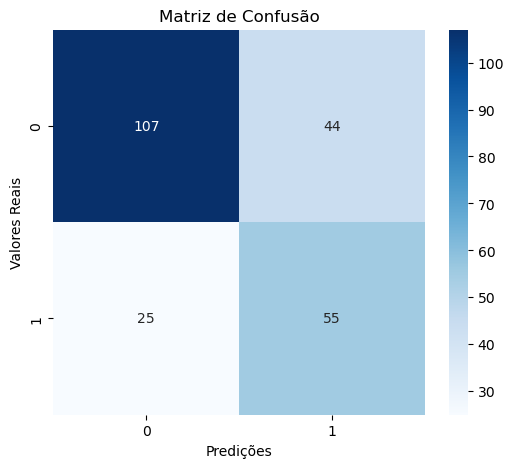

In [7]:
cm = confusion_matrix(y_test, y_pred_dt)
labels = np.unique(y_test)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusão')
plt.xlabel('Predições')
plt.ylabel('Valores Reais')
plt.show()